In [192]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [196]:
#Load the dataset
data=pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\5.EDA1\\Cardiotocographic.csv")
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [198]:
#Find the missing values
missing_values=data.isnull().sum()
missing_values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [200]:
#Handling the missing values
data.fillna(data.mean(),inplace=True)
missing_values_after=data.isnull().sum()
missing_values_after

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [202]:
#Identifying datatypes
print(data.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [204]:
#Identifying and correcting any inconsistencies in datatypes
data=data.apply(pd.to_numeric)
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [208]:
#Using Z-score to detect outliers
z_scores=np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers=np.where(z_scores>3)
#Handling outliers
data=data[(z_scores<3).all(axis=1)]
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [212]:
#Summary of the dataset
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,133.396067,0.003307,0.002455,0.004425,0.001501,2.619684e-09,0.000023,46.004564,1.189651,8.092469,8.449112,66.039638,0.351662,1.143480
std,9.894612,0.003659,0.005998,0.002853,0.002409,1.433519e-07,0.000152,16.087041,0.640247,13.903634,4.596622,35.328185,0.591343,0.350751
min,106.000000,-0.000185,-0.005106,-0.000132,-0.000124,-1.700000e-06,-0.000045,12.000000,0.200000,-1.043619,-0.136053,9.000000,-1.006614,0.967075
25%,126.000000,0.000000,0.000000,0.002192,0.000000,0.000000e+00,0.000000,32.000000,0.700000,0.000000,5.400000,37.000000,0.000000,1.000000
50%,133.000000,0.002079,0.000000,0.004562,0.000000,0.000000e+00,0.000000,47.000000,1.100000,0.000000,7.900000,60.000000,0.000000,1.000000
75%,141.000000,0.005867,0.001876,0.006596,0.002502,0.000000e+00,0.000000,59.000000,1.500000,10.000000,11.000000,94.000000,1.000000,1.000000
max,160.000000,0.014444,0.043053,0.012072,0.009778,1.604855e-06,0.001272,83.000000,3.500000,58.000000,23.767366,176.310998,1.023635,2.035160


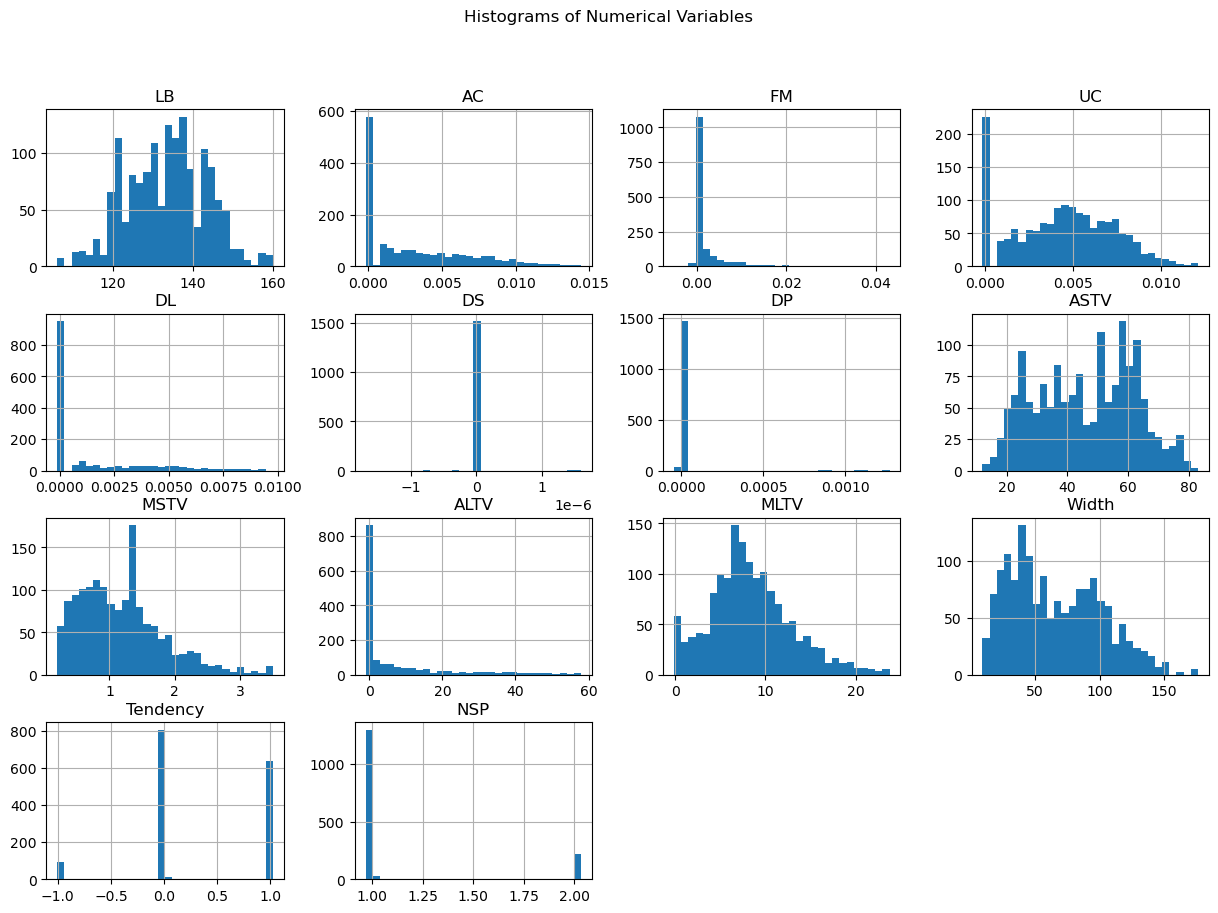

In [246]:
#Histograms to visualize the dstributions of various numerical variables
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

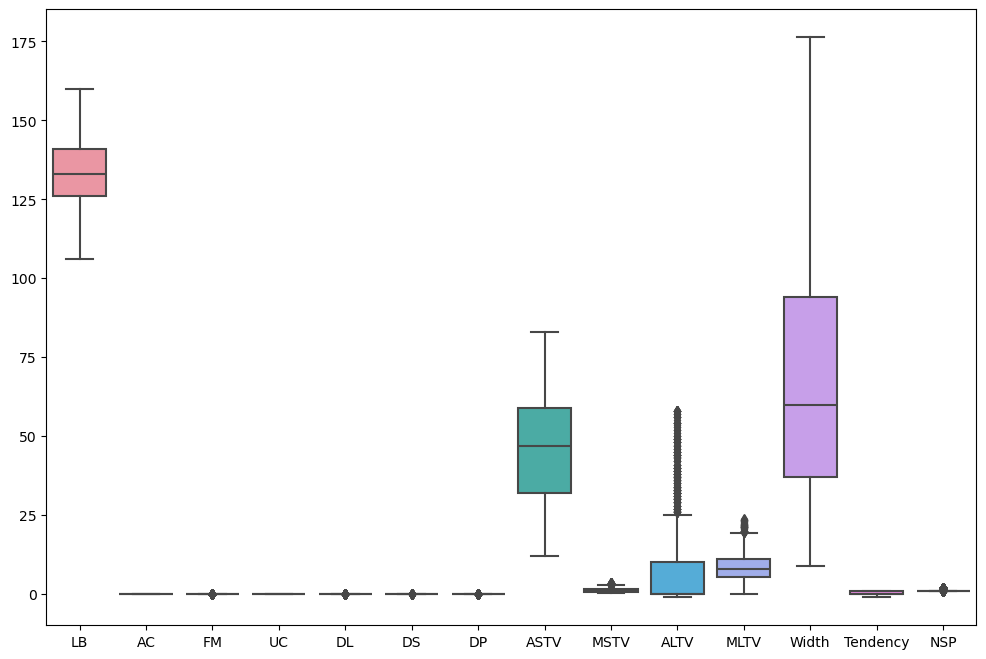

In [260]:
#Boxplots to visualize the dstributions of various numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.show()

In [214]:
#There are no categorical variables so to display the frequency of categories is not applicable with bar chart or pie chart.
#For this dataset, assuming all variables are numerical, this may not be applicable.

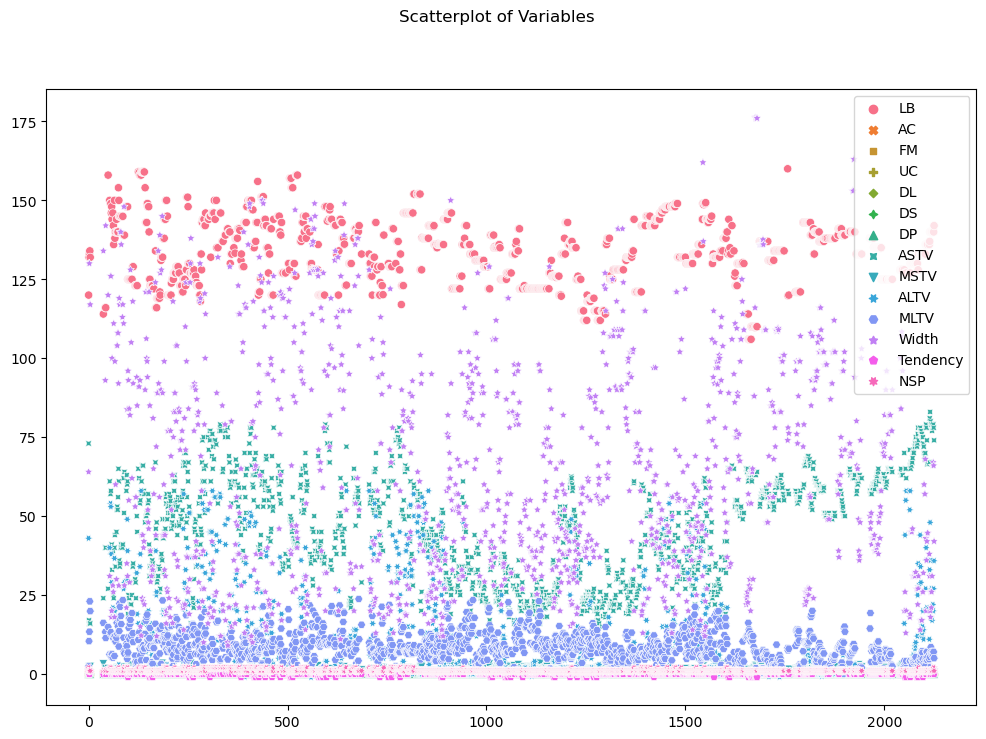

In [244]:
#scatter plot to explore relation between pairs of variables
plt.figure(figsize=(12, 8))
sns.scatterplot(data)
plt.suptitle('Scatterplot of Variables')
plt.show()

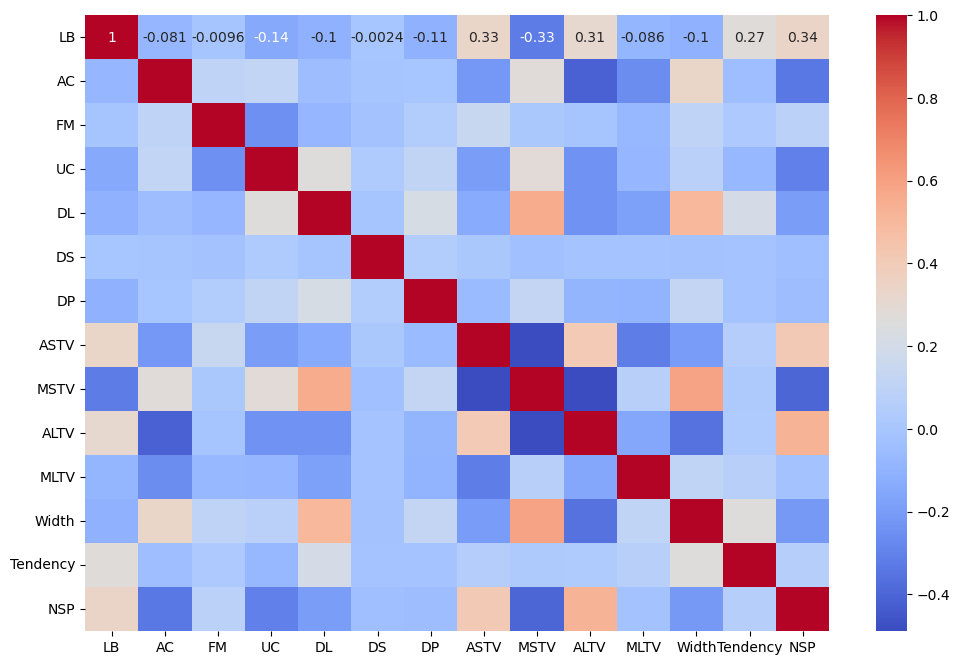

In [264]:
#Correlation heatmap to explore relation between pairs of variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

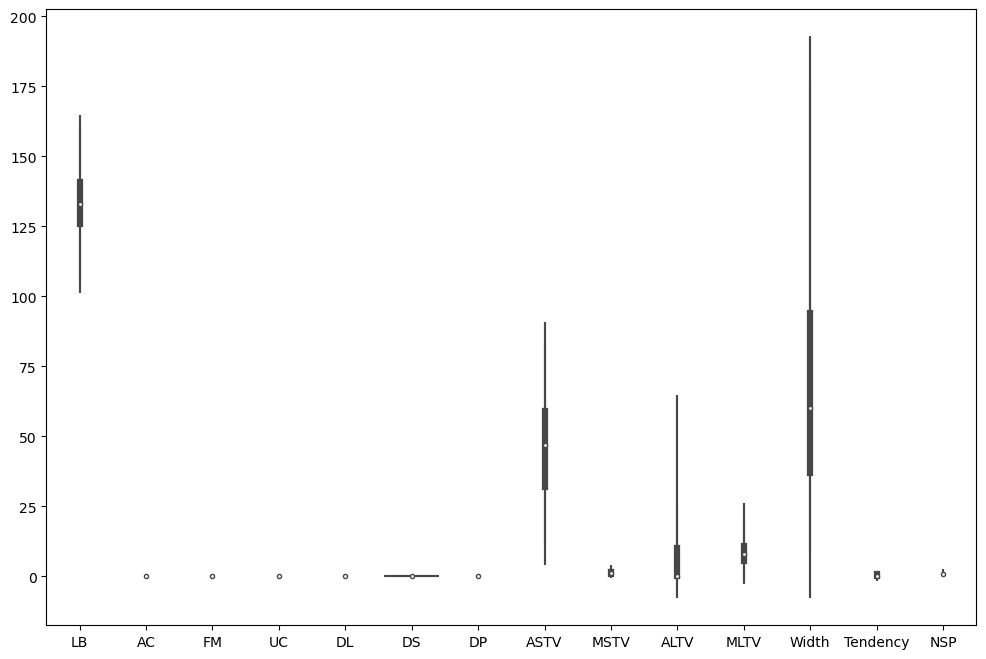

In [254]:
#Violin plots for advanced visualization techniques and deeper insights
plt.figure(figsize=(12,8))
sns.violinplot(data=data)
plt.show()

In [266]:
#Correlations
data.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080962,-0.009557,-0.142016,-0.102361,-0.002381,-0.107211,0.333970,-0.325624,0.308779,-0.085801,-0.103745,0.267848,0.337703
AC,-0.080962,1.000000,0.100901,0.119576,-0.047649,-0.006761,-0.002174,-0.221356,0.275966,-0.414251,-0.260105,0.336572,-0.044482,-0.337299
FM,-0.009557,0.100901,1.000000,-0.245766,-0.080172,-0.018269,0.043180,0.142740,0.014890,-0.011127,-0.072319,0.103996,0.017949,0.085814
UC,-0.142016,0.119576,-0.245766,1.000000,0.262225,0.029705,0.111724,-0.193828,0.284526,-0.244191,-0.080912,0.077903,-0.071447,-0.307931
DL,-0.102361,-0.047649,-0.080172,0.262225,1.000000,-0.009497,0.215407,-0.138976,0.553120,-0.236346,-0.184292,0.504791,0.208359,-0.194989
DS,-0.002381,-0.006761,-0.018269,0.029705,-0.009497,1.000000,0.041986,0.013552,-0.030920,-0.016035,-0.014701,-0.019769,-0.017569,-0.036820
DP,-0.107211,-0.002174,0.043180,0.111724,0.215407,0.041986,1.000000,-0.061659,0.122841,-0.088537,-0.098118,0.121867,-0.014620,-0.052657
ASTV,0.333970,-0.221356,0.142740,-0.193828,-0.138976,0.013552,-0.061659,1.000000,-0.485332,0.409301,-0.318214,-0.201127,0.056621,0.414549
MSTV,-0.325624,0.275966,0.014890,0.284526,0.553120,-0.030920,0.122841,-0.485332,1.000000,-0.489074,0.063620,0.588053,0.027705,-0.397235
ALTV,0.308779,-0.414251,-0.011127,-0.244191,-0.236346,-0.016035,-0.088537,0.409301,-0.489074,1.000000,-0.156058,-0.357470,0.029383,0.523587


Conclusion:

Statistical Summary: The dataset contains various measures of fetal heart rate and uterine contractions. The central tendency and dispersion metrics suggest that some variables, like 'LB' and 'MSTV', exhibit high variability.

Visual Insights: Histograms indicate the distribution of variables, showing that some variables are skewed. Boxplots reveal potential outliers in certain variables.

Correlation Analysis: The correlation heatmap shows strong relationships between variables like 'LB' and 'AC', suggesting they may influence each other.

Patterns: Notable trends include higher variability in 'ALTV' compared to 'MLTV', which may indicate different levels of fetal stress or monitoring accuracy.

Recommendations:

Further Analysis: Consider investigating the relationship between 'DL' and 'DP' in more detail, as they may be indicative of specific fetal conditions.
Data Collection: Additional contextual data, such as maternal health or pregnancy duration, could provide more insights into the observed patterns.